# Projektarbeit Gruppe 2: Gesundheitsdaten

https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset

In [7]:
# Import der benötigten Bibliotheken

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Lokaler Repository Pfad auslesen zum dynamischen Laden unabhängig des Nutzers:
path = str(os.getcwd()).replace("\Projektarbeit\Aufgaben", "")

# Lesen der CSV Datei:
dataset = pd.read_csv(path + '\smoking_driking_dataset_Ver01.csv')

# Umbenennen der Spalten:

dataset = dataset.rename(columns={'sex': 'Geschlecht', 'age': 'Alter', 'height': 'Größe', 'weight': 'Gewicht', 'waistline': 'Hüftumfang', 'sight_left': 'Sehkraft_links', 'sight_right': 'Sehkraft_rechts', 'hear_left': 'Hörkraft_links', 'hear_right': 'Hörkraft_rechts', 'SBP': 'Systolischer Blutdruck', 'DBP': 'Diastolischer Blutdruck', 'BLDS': 'Nüchterner Blutzucker', 'tot_chole': 'Totale Cholesterin', 'HDL_chole': 'HDL_Cholesterin', 'LDL_chole': 'LDL_Cholesterin', 'triglyceride': 'Triglycerid', 'hemoglobin': 'Hämoglobin', 'urine_protein': 'Urin_Proteine', 'serum_creatinine': 'Serum_Kreatinin', 'SGOT_AST': 'SGOT_AST', 'SGOT_ALT': 'SGOT_ALT', 'gamma_GTP': 'gamma_GTP', 'SMK_stat_type_cd': 'Raucher_Status', 'DRK_YN': 'Trinker'})

# BMI berechnen:
body_mass_index = dataset["Gewicht"].astype(np.float64) / ((dataset["Größe"].astype(np.float64) / 100) * (dataset["Größe"].astype(np.float64) / 100))

dataset["Body-Mass-Index"] = round(body_mass_index, 3)

dataset.head()

,Geschlecht,Alter,Größe,Gewicht,Hüftumfang,Sehkraft_links,Sehkraft_rechts,Hörkraft_links,Hörkraft_rechts,Systolischer Blutdruck,...,Triglycerid,Hemoglobin,Urin_Proteine,Serum_Kreatinin,SGOT_AST,SGOT_ALT,gamma_GTP,Raucher_Status,Trinker,Body-Mass-Index
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y,25.952
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N,24.691
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N,27.548
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N,26.122
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N,22.039


# Anforderungen 3: Datentransformation

Führen Sie zwei DataFrames mit merge zusammen - wenn Sie nur ein DataFrame haben, können Sie z.B. eine Konvertierungstabelle erstellen und anspielen (z.B. Land zu Kontinent)

In [9]:
# Merge Operation:

        # Erstellung eines neuen Dataframes, das für die Werte in der Spalte "Trinker" neue Daten hinzunimmt: 

data = {'Abbreviation':['Y', 'N'],
        'Description':['Yes', 'No'],
        'Number': [1, 0],
        'Boolean Value': [True, False]}

merge_dataframe = pd.DataFrame(data)

        # Zusammenführen der Datensätze:

merged_dataframe = dataset.merge(merge_dataframe,left_on='Trinker', right_on='Abbreviation')

merged_dataframe.head()

,Geschlecht,Alter,Größe,Gewicht,Hüftumfang,Sehkraft_links,Sehkraft_rechts,Hörkraft_links,Hörkraft_rechts,Systolischer Blutdruck,...,SGOT_AST,SGOT_ALT,gamma_GTP,Raucher_Status,Trinker,Body-Mass-Index,Abbreviation,Description,Number,Boolean Value
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,21.0,35.0,40.0,1.0,Y,25.952,Y,Yes,1,True
1,Male,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,...,29.0,40.0,37.0,3.0,Y,20.202,Y,Yes,1,True
2,Male,35,175,65,84.2,1.2,1.0,1.0,1.0,132.0,...,18.0,18.0,35.0,3.0,Y,21.224,Y,Yes,1,True
3,Male,55,170,75,84.0,1.2,0.9,1.0,1.0,145.0,...,32.0,23.0,26.0,1.0,Y,25.952,Y,Yes,1,True
4,Male,40,175,75,82.0,1.5,1.5,1.0,1.0,132.0,...,21.0,38.0,16.0,2.0,Y,24.490,Y,Yes,1,True


Erstellen Sie eine Pivot-Tabelle.

In [10]:
# Erstellen einer Pivot Tabelle:

CountPerSmokerDrinkerAge = pd.pivot_table(merged_dataframe, values='Number', 
                                index=['Trinker', 'Alter'],
                                aggfunc='count')

print(CountPerSmokerDrinkerAge)

               Number
Trinker Alter        
N       20       7936
        25      21083
        30      26218
        35      28506
        40      52199
        45      52110
        50      65322
        55      63239
        60      67722
        65      36689
        70      38329
        75      20657
        80      12843
        85       3005
Y       20      14035
        25      43287
        30      51382
        35      56220
        40      78186
        45      66245
        50      64112
        55      47984
        60      38341
        65      16272
        70      12337
        75       4676
        80       2125
        85        286


Überlegen Sie sich je mind. eine Analyse, die von den vorherigen Schritten ermöglicht werden. Erstellen Sie dazu Visualisierungen und fassen die Erkenntnisse zusammen.

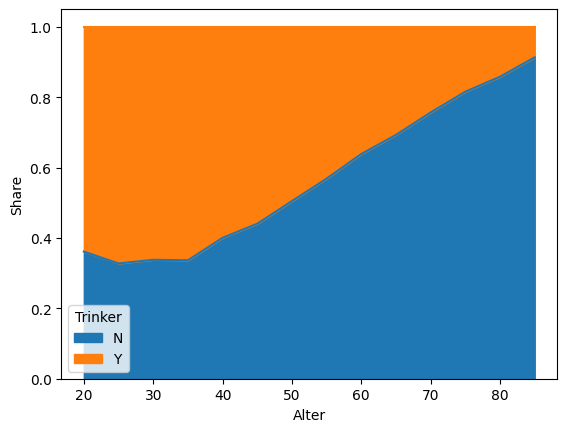

In [11]:
    # Entfernen des Index der Pivot-Tabelle für den späteren merge-Schritt

CountPerSmokerDrinkerAge = CountPerSmokerDrinkerAge.reset_index()

    # Erstellen einer neuen Pivot-Tabelle, die die Gesamtanzahl der Probanden je Alter darstellt & entfernen des Index:

CountPerAge = pd.pivot_table(merged_dataframe, values='Number', 
                                index=['Alter'],
                                aggfunc='count')

CountPerAge = CountPerAge.reset_index()

    # Merge-Operation der beiden Pivot-Tabellen:

output = CountPerSmokerDrinkerAge.merge(CountPerAge,left_on='Alter', right_on='Alter')

    # Berechnen des Trinker-Anteils mit Hilfe der zusammengefügten Pivot-Tabellen:

share = output["Number_x"].astype(np.float64) / output["Number_y"].astype(np.float64)

output["Share"] = share


# Analyse aus den vorherigen Schritten: Anteil Trinker je Altersgruppe

grouped_data = output.groupby(['Alter', 'Trinker'])['Share'].mean().unstack()

# Erstellen Sie das Flächendiagramm

grouped_data.plot(kind='area', stacked=True)
plt.xlabel('Alter')
plt.ylabel('Share')
plt.title('Anteil Trinker je Alter')
plt.show()

In [12]:
# Der Anteil an Trinkern im Datensatz nimmt fortlaufend über das Alter ab.
# Diese Entwicklung kann mehrere Ursachen haben.
#   Entweder müssen/gehen jüngere Menschen eher zum Arzt, wenn sie trinken.
#   Oder alte Menschen trinken durchschnittlich seltener.